# Breast Cancer Project - Keras Classification



### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cancer_classification.csv')

let's check data with info and describe:

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

Countplot for the cancer to be benign or not:

<IPython.core.display.Javascript object>


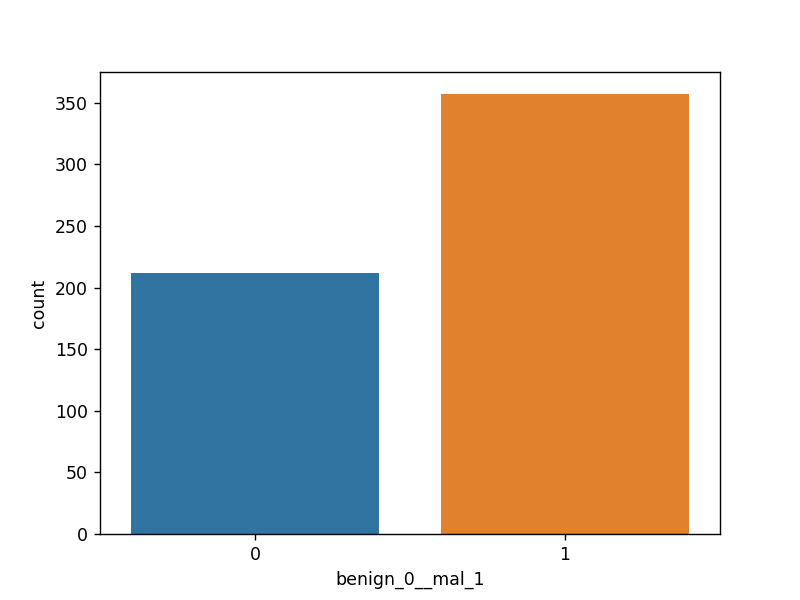

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

<IPython.core.display.Javascript object>


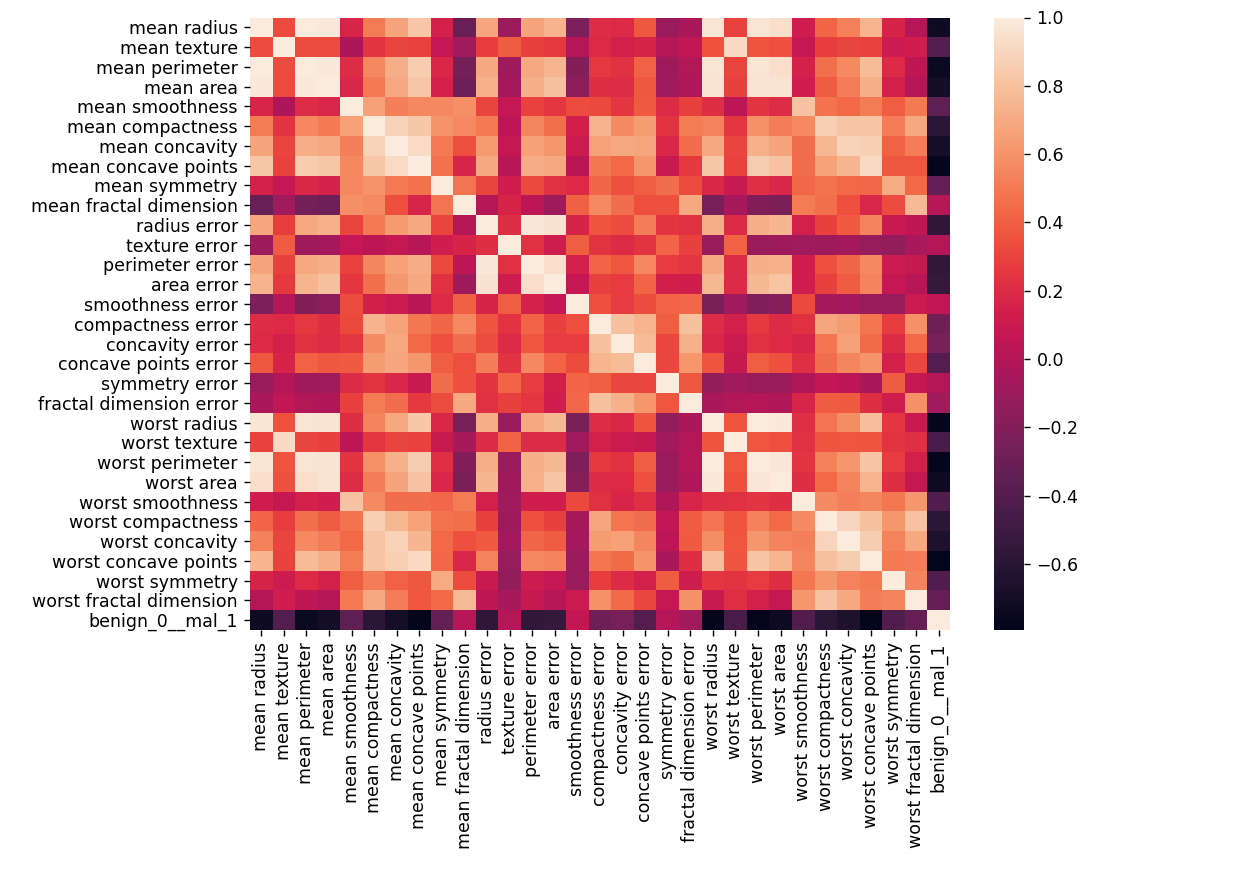

<Axes:>

In [69]:
fig = plt.figure(figsize=(10,7))
fig.add_axes([0.2,0.28,0.7,0.7])
sns.heatmap(df.corr())

In [30]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<IPython.core.display.Javascript object>


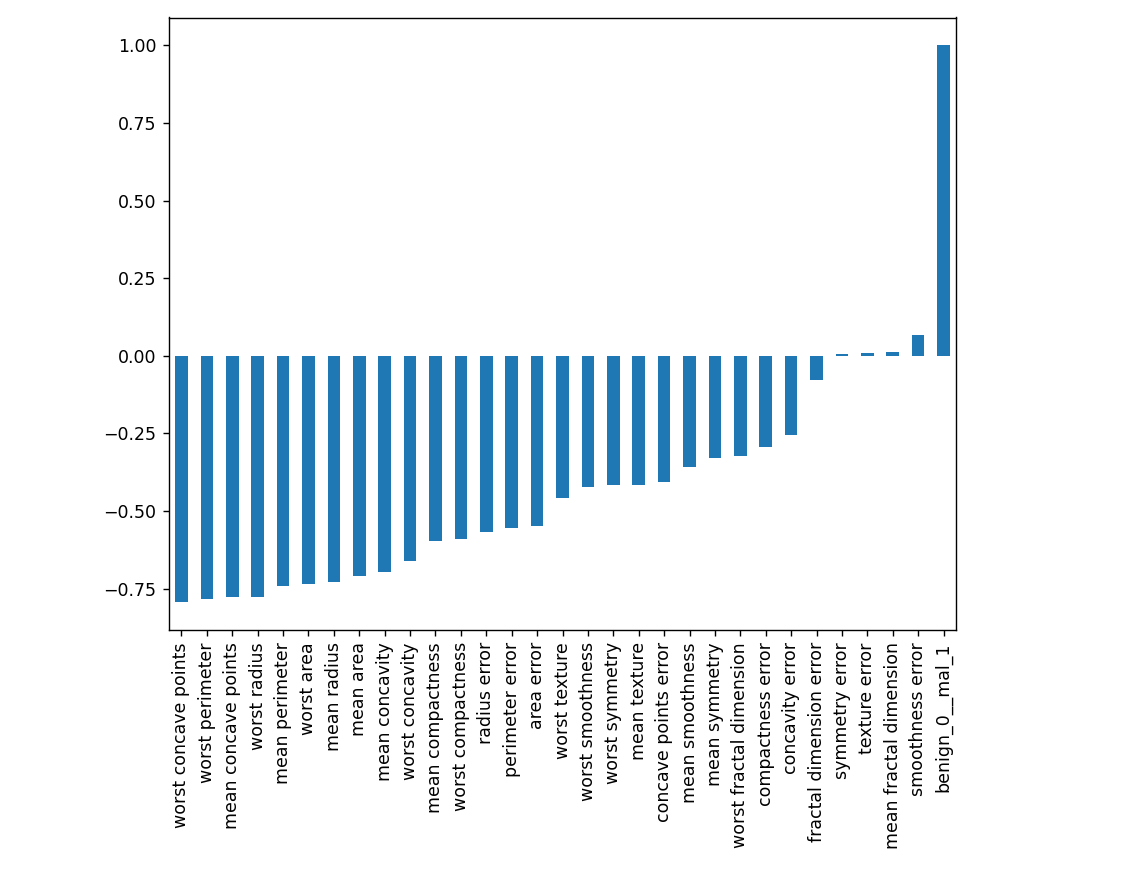

<Axes:>

In [76]:
fig = plt.figure(figsize=(9,7))
fig.add_axes([0.15,0.28,0.7,0.7])
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [32]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes:>

## Train and split

In [33]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Scaling Data

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(X_train)

MinMaxScaler()

In [39]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the model

### For a binary classification problem
`model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])`

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [41]:
X_train.shape

(426, 30)

In [42]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

## Training the model

### Example One: Choosing too many epochs and overfitting!

In [43]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6973 - val_loss: 0.6796
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6719 - val_loss: 0.6569
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6473 - val_loss: 0.6319
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6182 - val_loss: 0.5961
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5735 - val_loss: 0.5433
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5224 - val_loss: 0.4898
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4676 - val_loss: 0.4291
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4091 - val_loss: 0.3730
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3600 - val_loss: 0.3261
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3151 - val_loss: 0.2853
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0995
Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0495 - val_loss: 0.1060
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0481 - val_loss: 0.1033
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0492 - val_loss: 0.0998
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1078
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.1011
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0478 - val_loss: 0.1042
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0475 - val_loss: 0.1028
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0472 - val_loss: 0.1027
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0471 - val_loss: 0.1049
Epoch 92/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0362 - val_loss: 0.1117
Epoch 163/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.1225
Epoch 164/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0357 - val_loss: 0.1142
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0365 - val_loss: 0.1128
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0357 - val_loss: 0.1149
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.1169
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0351 - val_loss: 0.1170
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.1202
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.1161
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.1169
Epoc

Epoch 243/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0276 - val_loss: 0.1301
Epoch 244/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0274 - val_loss: 0.1211
Epoch 245/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 0.1235
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.1278
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.1301
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.1316
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.1364
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.1255
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.1272
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0288 - val_los

14/14 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.1410
Epoch 324/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.1356
Epoch 325/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.1340
Epoch 326/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.1354
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.1458
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.1379
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.1440
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.1324
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.1473
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.1363
Epoc

Epoch 404/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.1435
Epoch 405/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.1496
Epoch 406/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.1642
Epoch 407/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.1647
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.1502
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.1689
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.1486
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.1643
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.1574
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0125 - val_los

Epoch 485/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.1767
Epoch 486/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.1899
Epoch 487/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.1922
Epoch 488/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.1766
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.1934
Epoch 490/600
14/14 [==============================] - ETA: 0s - loss: 4.7127e-0 - 0s 2ms/step - loss: 0.0083 - val_loss: 0.1867
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.1944
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.1867
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.2044
Epoch 494/600
14/14 [==============================] - 0s 2ms/s

14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.2397
Epoch 566/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.2080
Epoch 567/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.2352
Epoch 568/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.1965
Epoch 569/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.2402
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.2076
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.2001
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.2097
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.2339
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.1954
Epoc

In [71]:
# model.history.history

In [44]:
model_loss = pd.DataFrame(model.history.history)

In [45]:
model_loss

,loss,val_loss
0,0.697350,0.679602
1,0.671900,0.656851
2,0.647259,0.631895
3,0.618152,0.596142
4,0.573457,0.543334
...,...,...
595,0.004653,0.237473
596,0.005824,0.254455
597,0.004702,0.213855
598,0.004679,0.234913


<IPython.core.display.Javascript object>


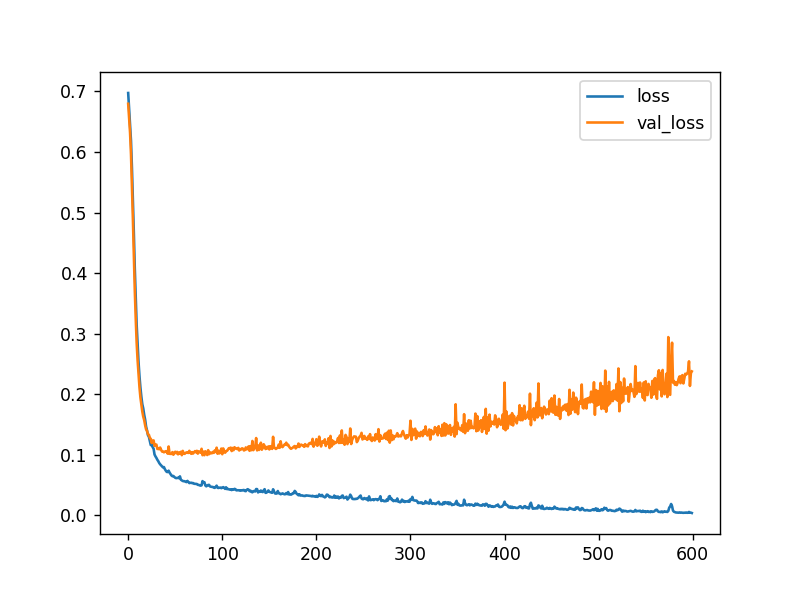

<AxesSubplot:>

In [46]:
model_loss.plot()

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [47]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='relu'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [50]:
model.fit(x=X_train,
         y=y_train,
         epochs=600,
         validation_data=(X_test,y_test),verbose=1,
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 1.2320 - val_loss: 1.0789
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 1.0065 - val_loss: 0.9221
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.8226 - val_loss: 0.7822
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7012 - val_loss: 0.6737
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6778 - val_loss: 0.7555
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6931 - val_loss: 0.6743
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5949 - val_loss: 0.5773
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5086 - val_loss: 0.5935
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4565 - val_loss: 0.5294
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3992 - val_loss: 0.4723
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0471 - val_loss: 0.1808
Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0481 - val_loss: 0.1799
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.1742
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.1842
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0488 - val_loss: 0.1753
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.1745
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0441 - val_loss: 0.1773
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0443 - val_loss: 0.1754
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0477 - val_loss: 0.1739
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0486 - val_loss: 0.1908
Epoch 92/600


Epoch 163/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 0.1660
Epoch 164/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0307 - val_loss: 0.1674
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.1665
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.1653
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.1672
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.1627
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.1630
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1653
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.1667
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0307 - val_los

<IPython.core.display.Javascript object>


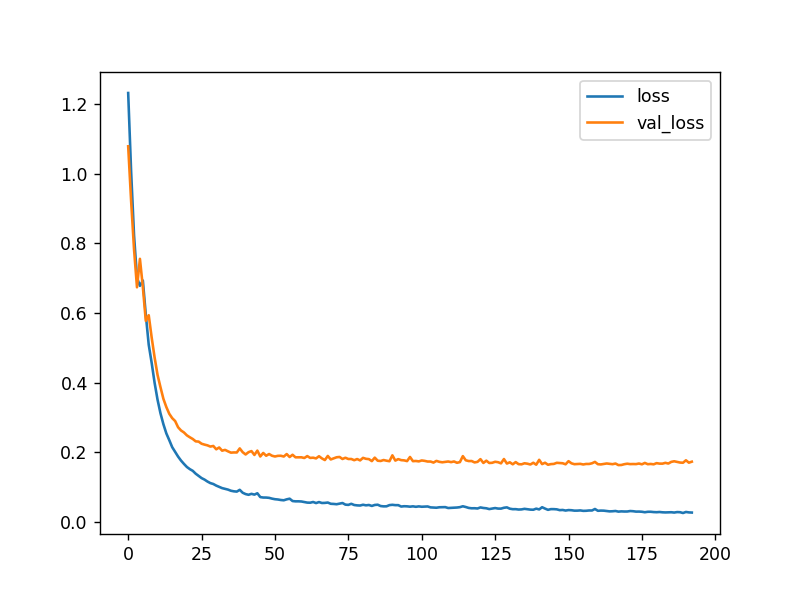

<AxesSubplot:>

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6820 - val_loss: 0.6393
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6457 - val_loss: 0.6073
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6127 - val_loss: 0.5733
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5881 - val_loss: 0.5393
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5551 - val_loss: 0.5086
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5349 - val_loss: 0.4799
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5219 - val_loss: 0.4524
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4993 - val_loss: 0.4260
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4484 - val_loss: 0.3957
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4421 - val_loss: 0.3634
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1001 - val_loss: 0.0897
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1045 - val_loss: 0.0990
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0931 - val_loss: 0.0923
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1143 - val_loss: 0.0896
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0928 - val_loss: 0.0939
Epoch 88/600
14/14 [==============================] - ETA: 0s - loss: 0.085 - 0s 2ms/step - loss: 0.1050 - val_loss: 0.0928
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1007 - val_loss: 0.0994
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0841 - val_loss: 0.0915
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0957 - val_loss: 0.0883
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.

<IPython.core.display.Javascript object>


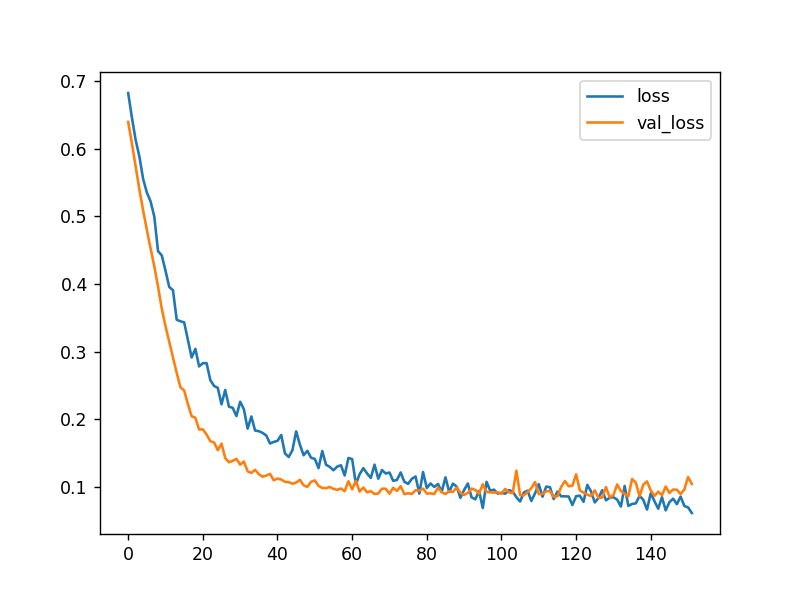

<AxesSubplot:>

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [56]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [59]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
